In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

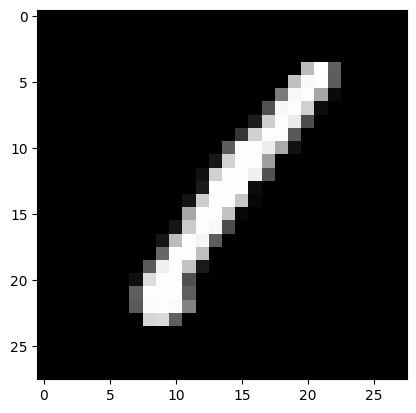

In [3]:
df = pd.read_csv("train.csv").values
X = df[:, 1:]
y = df[:, 0]
X = X / 255.0 #normalize values, from 255 to 1, just works faster and more accurate
# prevents larger pixels from overpowering smaller ones

X = X.astype("float32")
# need float point values for smooth propagation during training

image = X[0].reshape(28, 28)
plt.imshow(image, cmap="gray")
plt.show()

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# split into train 80%, validation 10% and test 10% 
# validation set to tune model hyperparameters, prevents overfitting 

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (33600, 784) (33600,)
Validation set: (4200, 784) (4200,)
Test set: (4200, 784) (4200,)


In [10]:
# why use a neural network here: learns patterns in terms of curves and straight lines, and 
# recognizes numbers even if theyre tilted

#then change images from (num_samples, 784) to (num_samples, 28, 28, 1) because CNNs use 2D input, not 1D
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),#detect image features
    layers.MaxPooling2D(pool_size=(2,2)), #reduce image sizing for speed

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),  #size down more 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

#define optimizer, loss function, and metrics used, just ways to measure model stuff 
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#an epoch is one complete pass through the dataset during training, 
#train the mf model, use the model to run over the training data 10 times (all the data)

training = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10, batch_size = 32)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8730 - loss: 0.4105 - val_accuracy: 0.9776 - val_loss: 0.0738
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9825 - loss: 0.0562 - val_accuracy: 0.9874 - val_loss: 0.0451
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9894 - loss: 0.0347 - val_accuracy: 0.9864 - val_loss: 0.0502
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9893 - val_loss: 0.0350
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9951 - loss: 0.0132 - val_accuracy: 0.9910 - val_loss: 0.0371
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9961 - loss: 0.0108 - val_accuracy: 0.9871 - val_loss: 0.0484
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9969 - loss: 0.0088 - 

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0451
Test Accuracy: 0.9907


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


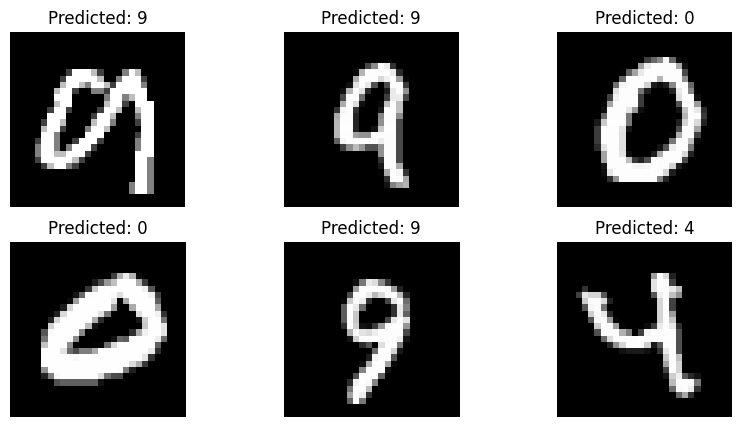

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10,5))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis("off")

plt.show()

In [16]:
#Slight different model with inclusion of 
# dropout (randomly turn off 50% of neurons) to prevent overfitting
# batch normalization - normalized data
# more layers, more complex features
# uses dropout, batch normalization
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(), #normalization
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(), #normalization
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5), #dropout
    layers.Dense(10, activation='softmax')  
])

#retrain
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit( X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32 )




Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9031 - loss: 0.3251 - val_accuracy: 0.9848 - val_loss: 0.0459
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9789 - loss: 0.0664 - val_accuracy: 0.9764 - val_loss: 0.0812
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9818 - loss: 0.0528 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9876 - loss: 0.0416 - val_accuracy: 0.9912 - val_loss: 0.0306
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9902 - val_loss: 0.0324
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9908 - loss: 0.0314 - val_accuracy: 0.9881 - val_loss: 0.0367
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9910 - val_loss: 0.0293
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9917 -

In [19]:
#data augmentation - artificially increase dataset size via transformations to the images
# makes CNN generalize better by creating more variations

datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images up to 10 degrees
    zoom_range=0.1,  # Zoom in/out by 10%
    width_shift_range=0.1,  # Shift image left/right by 10%
    height_shift_range=0.1  # Shift image up/down by 10%
)

datagen.fit(X_train)

#train
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Use the augmented images
    validation_data=(X_val, y_val),
    epochs=15
)


Epoch 1/15


/Users/linlee10/Desktop/Personal_projects/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9634 - loss: 0.1318 - val_accuracy: 0.9931 - val_loss: 0.0203
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9808 - loss: 0.0675 - val_accuracy: 0.9907 - val_loss: 0.0267
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9855 - loss: 0.0519 - val_accuracy: 0.9921 - val_loss: 0.0236
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9854 - loss: 0.0492 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9859 - loss: 0.0457 - val_accuracy: 0.9931 - val_loss: 0.0204
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9887 - loss: 0.0387 - val_accuracy: 0.9919 - val_loss: 0.0216
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9872 - loss: 0.0385 - val_accuracy: 0.9919 - val_loss: 0.0277
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9897 - loss: 0.03

In [22]:
#tuning hyperparameters (learning rate, batch size, filters, dropout rate)
# hyperparameters - settings that control how the model learns, 

optimizer = Adam(learning_rate=0.001)  # Start with 0.001
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

for batch_size in [32, 64, 128]:
    print(f"\nTraining with batch size: {batch_size}")
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=10
    )




Training with batch size: 32
Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9919 - loss: 0.0287 - val_accuracy: 0.9936 - val_loss: 0.0184
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9906 - loss: 0.0310 - val_accuracy: 0.9940 - val_loss: 0.0194
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9957 - val_loss: 0.0167
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9931 - val_loss: 0.0180
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9936 - val_loss: 0.0209
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9945 - val_loss: 0.0161
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9924 - loss: 0.0243 - val_accuracy: 0.9940 - val_loss: 0.0215
Epoch 8/10
 826/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 1

KeyboardInterrupt: 

In [ ]:
# Define improved CNN with optimized hyperparameters
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),  # Optimized dropout

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  
])

model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_val, y_val),
                     epochs=15,callbacks=[lr_scheduler]  
)
